### Initializing pymc3

In [57]:
import pymc3 as pm
import numpy as np
import matplotlib.pyplot as plt
import math
from pymc3 import sample_ppc

print('Running on PyMC3 v{}'.format(pm.__version__))

Running on PyMC3 v3.3


### Specifying training data

In [58]:
#X Data
trt = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

base = np.array([11, 11, 6, 8, 66, 27, 12, 52, 23, 10, 52, 33, 18,
                 42, 87, 50, 18, 111, 18, 20, 12, 9, 17, 28, 55, 9, 10, 47, 76, 38, 19, 10,
                 19, 24, 31, 14, 11, 67, 41, 7, 22, 13, 46, 36, 38, 7, 36, 11, 151, 22, 41,
                 32, 56, 24, 16, 22, 25, 13, 12])
age = np.array([31, 30, 25, 36, 22, 29, 31, 42, 37, 28, 36, 24, 23,
                36, 26, 26, 28, 31, 32,21, 29, 21, 32, 25, 30, 40,
                19, 22, 18, 32, 20, 30, 18, 24, 30, 35, 27, 20,22,
                28, 23, 40, 33, 21, 35, 25, 26, 25, 22, 32, 25,35, 21, 41, 32, 26, 21, 36, 37])

v4 = np.array([0,0,0,1])

#Y data
y = np.array([[5,3,3,3],[3,5,3,3],[2,4,0,5],[4,4,1,4],[7,18,9,21],[5,2,8,7],[6,4,0,2],[40,20,21,12],[5,6,6,5],
   [14,13,6,0],[26,12,6,22],[12,6,8,4],[4,4,6,2],[7,9,12,14],[16,24,10,9],[11,0,0,5],[0,0,3,3],[37,29,28,29],
   [3,5,2,5],[3,0,6,7],[3,4,3,4],[3,4,3,4],[2,3,3,5],[8,12,2,8],[18,24,76,25],[2,1,2,1],[3,1,4,2],
   [13,15,13,12],[11,14,9,8],[8,7,9,4],[0,4,3,0],[3,6,1,3],[2,6,7,4],[4,3,1,3],[22,17,19,16],
   [5,4,7,4],[2,4,0,4],[3,7,7,7],[4,18,2,5],[2,1,1,0],[0,2,4,0],[5,4,0,3],[11,14,25,15],[10,5,3,8],
   [19,7,6,7],[1,1,2,3],[6,10,8,8],[2,1,0,0],[102,65,72,63],[4,3,2,4],[8,6,5,7],[1,3,1,5],[18,11,28,13],
   [6,3,4,0],[3,5,4,3],[1,23,19,8],[2,3,0,1],[0,0,0,0],[1,4,3,2]])

data_size = len(age)
days = 4

### Preprocessing

In [59]:
#augment data to have same dimensions
trt = trt.reshape(-1,1)
trt = np.tile(trt,(1,4))

base = base.reshape(-1,1)
base = np.tile(base,(1,4))

age = age.reshape(-1,1)
age = np.tile(age,(1,4))

v4 = v4.reshape(-1,1)
v4 = np.tile(v4,(1,59)).T

print(trt.shape,base.shape,age.shape,v4.shape)

(59, 4) (59, 4) (59, 4) (59, 4)


### Specifying the model

In [60]:
#Creating the model

model = pm.Model()

with model:
    #priors
    
    var_b  = pm.InverseGamma('var_b',1,1)
    var_b1 = pm.InverseGamma('var_b1',1,1)
    
    a_base = pm.Normal('alpha_base',mu=0,sd=100)
    a_trt = pm.Normal('alpha_trt',mu=0,sd=100)
    a_bt = pm.Normal('alpha_bt',mu=0,sd=100)
    a_age = pm.Normal('alpha_age',mu=0,sd=100)
    a_v4 = pm.Normal('alpha_v4',mu=0,sd=100)
    a_not = pm.Normal('alpha_not',mu=0,sd=100)
    
    b1 = pm.Normal('b1',mu=0,sd=np.sqrt(var_b1))
    b = pm.Normal('b',mu=0,sd=np.sqrt(var_b))
    
    #expected value of parameter mu
   # log_mu = a_not + (a_base * np.log(base/4)) + (a_trt * trt) + (a_bt * trt * np.log(base/4)) \
   #             + (a_age * np.log(age)) + b1
    log_mu = a_not + (a_v4*v4) + (a_base * np.log(base/4)) + (a_trt * trt) + (a_bt * trt * np.log(base/4)) + (a_age * np.log(age)) + b1 + b

    mu = np.exp(log_mu)
    #likelihood
    Y_obs = pm.Poisson('Y_obs',mu,observed=y)

### Run built in MCMC

In [ ]:
#get the posterior 
with model:
    step = pm.Metropolis()
    trace = pm.sample(500,step)

Multiprocess sampling (2 chains in 2 jobs)
CompoundStep
>Metropolis: [b]
>Metropolis: [b1]
>Metropolis: [alpha_not]
>Metropolis: [alpha_v4]
>Metropolis: [alpha_age]
>Metropolis: [alpha_bt]
>Metropolis: [alpha_trt]
>Metropolis: [alpha_base]
>Metropolis: [var_b1_log__]
>Metropolis: [var_b_log__]
 58%|█████▊    | 576/1000 [00:01<00:00, 519.26it/s]

In [24]:
pm.summary(trace)

,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
alpha_base,0.919339,0.023519,0.002277,0.869158,0.957843,2.0,1.292779
alpha_trt,-1.188043,0.073522,0.007128,-1.302942,-1.041098,1.0,1.938643
alpha_bt,0.460801,0.031396,0.003025,0.401961,0.504429,1.0,1.806165
alpha_age,0.173298,0.043783,0.004360,0.105015,0.248278,1.0,2.226301
alpha_v4,-0.158316,0.050033,0.004240,-0.249441,-0.067267,65.0,1.014239
alpha_not,0.529455,0.111779,0.010985,0.365311,0.830787,3.0,1.303690
b1,-0.804809,0.311145,0.031079,-1.198055,-0.273863,1.0,3.826954
b,0.025008,0.500871,0.050068,-0.611517,0.689116,1.0,7.398244
var_b,1.675037,2.426740,0.145021,0.149273,5.315690,270.0,0.999792
var_b1,2.945553,7.452849,0.495450,0.163581,11.089717,141.0,1.012333


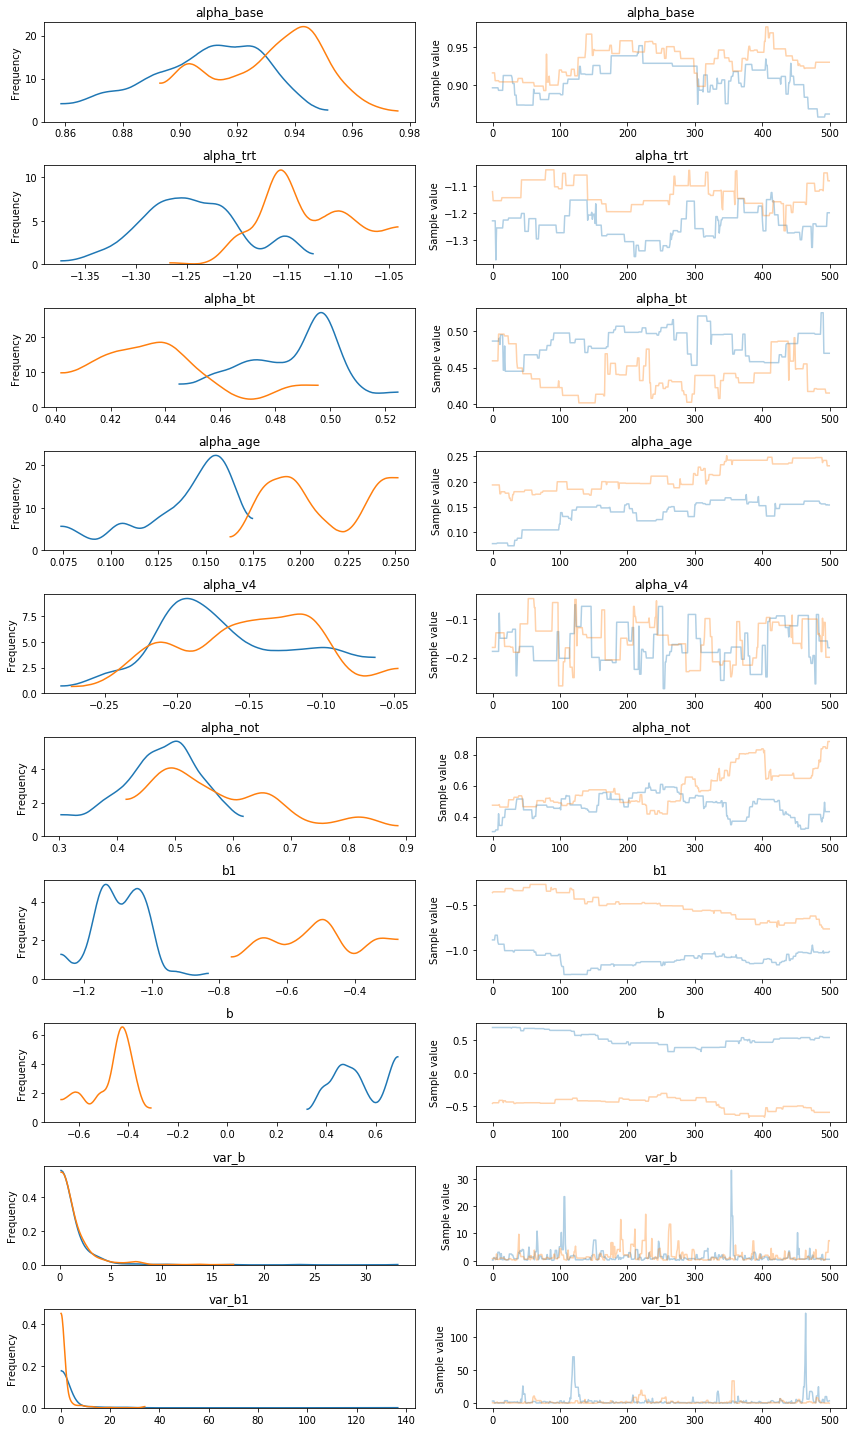

In [25]:
_ = pm.traceplot(trace)

In [53]:
ppc = sample_ppc(trace, model=model, samples=500)

100%|██████████| 500/500 [00:00<00:00, 2639.88it/s]


In [54]:
predictions = ppc['Y_obs']

#get the mean and variance of the predictions
mean_preds = np.mean(predictions,axis=0)
var_preds =  np.var(predictions,axis=0)

mse_loss = np.sum((y - mean_preds) ** 2) / (59 * 4.0)

print('MSE loss: ',mse_loss)
print('True Values: ',y)
print('Mean predictions: ',mean_preds)
print('Variance of predictions: ',var_preds)

MSE loss:  51.170775305084746
True Values:  [[  5   3   3   3]
 [  3   5   3   3]
 [  2   4   0   5]
 [  4   4   1   4]
 [  7  18   9  21]
 [  5   2   8   7]
 [  6   4   0   2]
 [ 40  20  21  12]
 [  5   6   6   5]
 [ 14  13   6   0]
 [ 26  12   6  22]
 [ 12   6   8   4]
 [  4   4   6   2]
 [  7   9  12  14]
 [ 16  24  10   9]
 [ 11   0   0   5]
 [  0   0   3   3]
 [ 37  29  28  29]
 [  3   5   2   5]
 [  3   0   6   7]
 [  3   4   3   4]
 [  3   4   3   4]
 [  2   3   3   5]
 [  8  12   2   8]
 [ 18  24  76  25]
 [  2   1   2   1]
 [  3   1   4   2]
 [ 13  15  13  12]
 [ 11  14   9   8]
 [  8   7   9   4]
 [  0   4   3   0]
 [  3   6   1   3]
 [  2   6   7   4]
 [  4   3   1   3]
 [ 22  17  19  16]
 [  5   4   7   4]
 [  2   4   0   4]
 [  3   7   7   7]
 [  4  18   2   5]
 [  2   1   1   0]
 [  0   2   4   0]
 [  5   4   0   3]
 [ 11  14  25  15]
 [ 10   5   3   8]
 [ 19   7   6   7]
 [  1   1   2   3]
 [  6  10   8   8]
 [  2   1   0   0]
 [102  65  72  63]
 [  4   3   2   4]
 [  8 

array([[1., 2.],
       [3., 4.]])